In [1]:
import sys
sys.path.append("../")
from tfMFs.tfCMF import tfCMF
from dataset import create_synthetic_data
import numpy as np
from scipy.sparse import csr_matrix, vstack
import matplotlib.pyplot as plt

In [2]:
def synthetic_experiment(num_pos_users=2000, num_neg_users=2000, num_random_words=10000,
                        lam=None, shape=0.1, scale=0.5, pos_lam=0, neg_lam=0, pos_shape=0, neg_shape=0,
                         pos_scale=0, neg_scale=0,dim = 10,optim_steps=100, init="svd", over=False):
    
    X, y = create_synthetic_data(
        num_pos_users=num_pos_users, 
        num_neg_users=num_neg_users, 
        num_random_words=num_random_words,
        lam=lam, 
        shape=shape, 
        scale=scale,
        pos_lam=pos_lam, 
        neg_lam=neg_lam,
        pos_shape=pos_shape,
        neg_shape=neg_shape,
        pos_scale=pos_scale,
        neg_scale=neg_scale,
    )
    if over :
        over_idx = np.random.choice(np.where(y == 1)[0], y.shape[0] - 2 * y.sum())
        X = vstack([csr_matrix(X), csr_matrix(X)[over_idx]])
        
    print(f"sparsity = {X.nnz / (X.shape[0] * X.shape[1])}")
    y = y[:,np.newaxis]
    X_train = X.A
    X_valid = X.A
    
    cmf_SGD = tfCMF(alpha=0.7, d_hidden=dim, lamda=1)
    U, V, Z, train_loss_SGD, _ = cmf_SGD.train(X_train, X_valid, y, optim_steps=optim_steps, early_stopping=optim_steps, lr=0.001, optimizer="SGD",init=init )
    
    cmf_Adam = tfCMF(alpha=0.7, d_hidden=dim, lamda=1)
    U, V, Z, train_loss_Adam, _ = cmf_SGD.train(X_train, X_valid, y, optim_steps=optim_steps, early_stopping=optim_steps, lr=0.001, optimizer="Adam", init=init)
    
    plt.plot(np.arange(0,optim_steps),train_loss_SGD, label="SGD")
    plt.plot(np.arange(0,optim_steps),train_loss_Adam, label="Adam")
    plt.legend()
    plt.show()

# スパース性

## small data

sparsity = 0.0394625


100%|██████████| 100/100 [00:13<00:00,  7.43it/s]


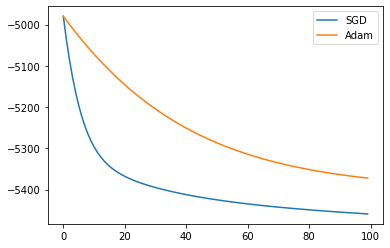

In [19]:
synthetic_experiment(
    num_pos_users=200, # small size
    num_neg_users=200, # small size
    num_random_words=1000, # small size
    lam=None, 
    shape=0.1, # sparsity low
    scale=0.5,
    dim = 10
)

sparsity = 0.0183


100%|██████████| 100/100 [00:13<00:00,  7.69it/s]


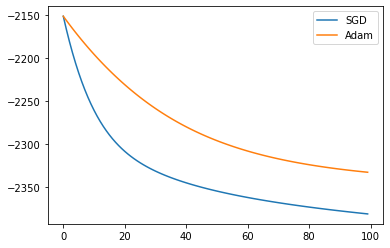

In [20]:
synthetic_experiment(
    num_pos_users=200, # small size
    num_neg_users=200, # small size
    num_random_words=1000, # small size
    lam=None, 
    shape=0.05, # sparsity medium
    scale=0.5,
    dim = 10
)

sparsity = 0.0033525


100%|██████████| 100/100 [00:12<00:00,  8.23it/s]


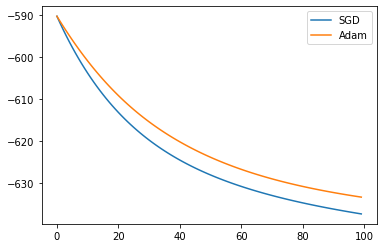

In [21]:
synthetic_experiment(
    num_pos_users=200, # small size
    num_neg_users=200, # small size
    num_random_words=1000, # small size
    lam=None, 
    shape=0.01, # sparsity high
    scale=0.5,
    dim = 10
)

## medium data

sparsity = 0.03753533333333333


100%|██████████| 100/100 [00:23<00:00,  4.34it/s]


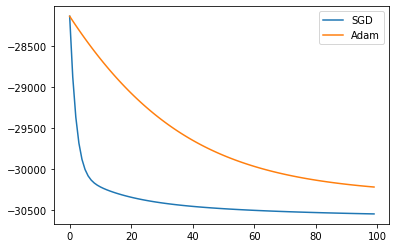

In [22]:
synthetic_experiment(
    num_pos_users=500, # medium size
    num_neg_users=500, # medium size
    num_random_words=3000, # medium size
    lam=None, 
    shape=0.1, # sparsity low
    scale=0.5,
    dim = 10
)

sparsity = 0.019851


100%|██████████| 100/100 [00:22<00:00,  4.42it/s]


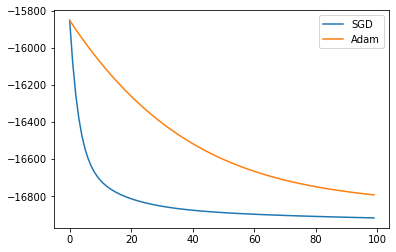

In [23]:
synthetic_experiment(
    num_pos_users=500, # medium size
    num_neg_users=500, # medium size
    num_random_words=3000, # medium size
    lam=None, 
    shape=0.05, # sparsity medium
    scale=0.5,
    dim = 10
)

sparsity = 0.004606666666666667


100%|██████████| 100/100 [00:22<00:00,  4.35it/s]


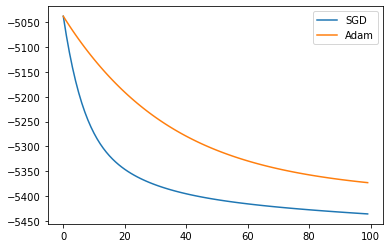

In [24]:
synthetic_experiment(
    num_pos_users=500, # medium size
    num_neg_users=500, # medium size
    num_random_words=3000, # medium size
    lam=None, 
    shape=0.01, # sparsity low
    scale=0.5,
    dim = 10
)

sparsity = 0.00046533333333333333


100%|██████████| 100/100 [00:07<00:00, 13.24it/s]


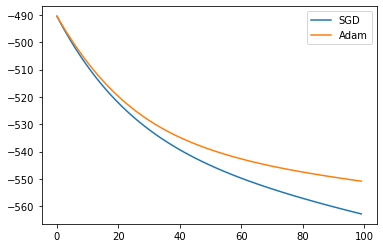

In [35]:
synthetic_experiment(
    num_pos_users=500, # medium size
    num_neg_users=500, # medium size
    num_random_words=3000, # medium size
    lam=None, 
    shape=0.001, # sparsity low
    scale=0.5,
    dim = 10
)

## large data

sparsity = 0.039653158333333334


100%|██████████| 100/100 [03:56<00:00,  2.36s/it]


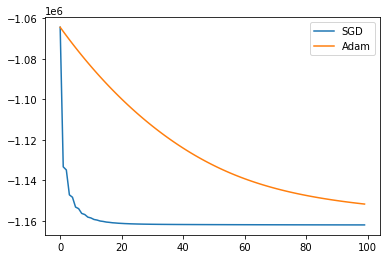

In [3]:
synthetic_experiment(
    num_pos_users=2000, # large size
    num_neg_users=2000, # large size
    num_random_words=30000, # large size
    lam=None, 
    shape=0.1, # sparsity low
    scale=0.5,
    dim = 10
)

sparsity = 0.02004955


100%|██████████| 100/100 [04:00<00:00,  2.40s/it]


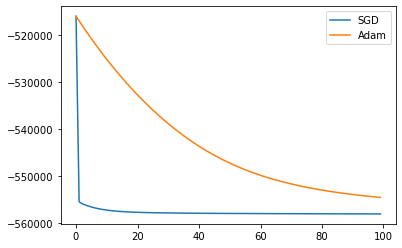

In [4]:
synthetic_experiment(
    num_pos_users=2000, # large size
    num_neg_users=2000, # large size
    num_random_words=30000, # large size
    lam=None, 
    shape=0.05, # sparsity medium
    scale=0.5,
    dim = 10
)

sparsity = 0.0042726583333333335


100%|██████████| 100/100 [03:54<00:00,  2.35s/it]


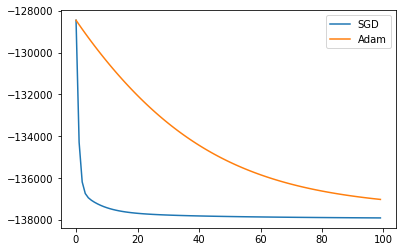

In [5]:
synthetic_experiment(
    num_pos_users=2000, # large size
    num_neg_users=2000, # large size
    num_random_words=30000, # large size
    lam=None, 
    shape=0.01, # sparsity medium
    scale=0.5,
    dim = 10
)

# 潜在次元数

## small data

100%|██████████| 100/100 [00:12<00:00,  8.22it/s]


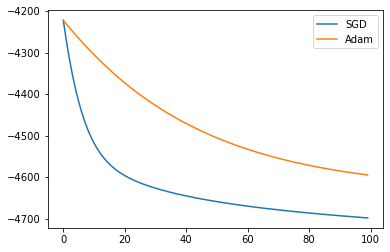

In [7]:
synthetic_experiment(
    num_pos_users=200, # small size
    num_neg_users=200, # small size
    num_random_words=1000, # small size
    lam=None, 
    shape=0.1, 
    scale=0.5,
    dim = 10 # small dim
)

100%|██████████| 100/100 [00:13<00:00,  7.41it/s]


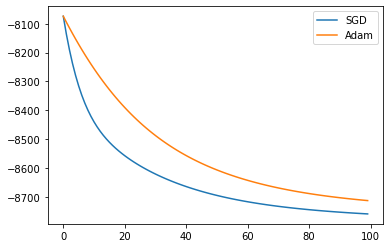

In [9]:
synthetic_experiment(
    num_pos_users=200, # small size
    num_neg_users=200, # small size
    num_random_words=1000, # small size
    lam=None, 
    shape=0.1, 
    scale=0.5,
    dim = 50 # medium dim
)

100%|██████████| 100/100 [00:13<00:00,  7.18it/s]


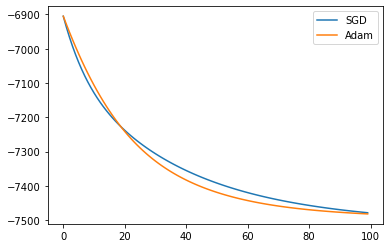

In [10]:
synthetic_experiment(
    num_pos_users=200, # small size
    num_neg_users=200, # small size
    num_random_words=1000, # small size
    lam=None, 
    shape=0.1, 
    scale=0.5,
    dim = 100 # large dim
)

## medium data

sparsity = 0.040698


100%|██████████| 100/100 [00:23<00:00,  4.30it/s]


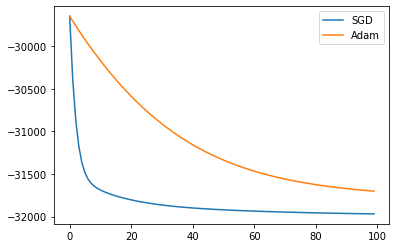

In [14]:
synthetic_experiment(
    num_pos_users=500, # medium size
    num_neg_users=500, # medium size
    num_random_words=3000, # medium size
    lam=None, 
    shape=0.1, 
    scale=0.5,
    dim = 10 # small dim
)

sparsity = 0.039626666666666664


100%|██████████| 100/100 [00:08<00:00, 12.06it/s]


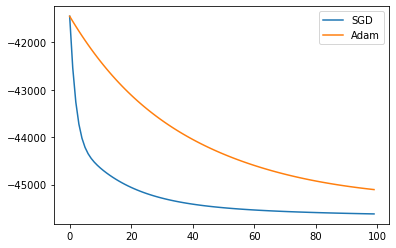

In [36]:
synthetic_experiment(
    num_pos_users=500, # medium size
    num_neg_users=500, # medium size
    num_random_words=3000, # medium size
    lam=None, 
    shape=0.1, 
    scale=0.5,
    dim = 50 # medium dim
)

sparsity = 0.03908866666666667


100%|██████████| 100/100 [00:09<00:00, 10.02it/s]


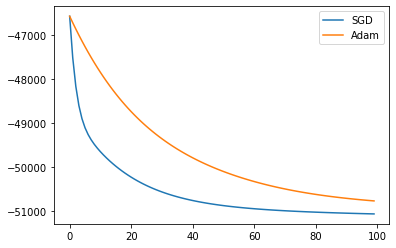

In [15]:
synthetic_experiment(
    num_pos_users=500, # medium size
    num_neg_users=500, # medium size
    num_random_words=3000, # medium size
    lam=None, 
    shape=0.1, 
    scale=0.5,
    dim = 100 # medium dim
)

sparsity = 0.039894


100%|██████████| 100/100 [00:11<00:00,  8.68it/s]


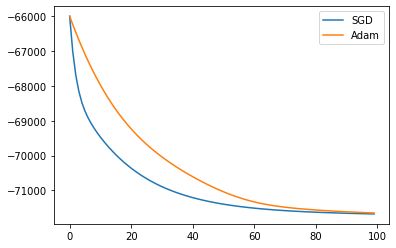

In [16]:
synthetic_experiment(
    num_pos_users=500, # medium size
    num_neg_users=500, # medium size
    num_random_words=3000, # medium size
    lam=None, 
    shape=0.1, 
    scale=0.5,
    dim = 250 # large dim
)

## large data

sparsity = 0.040698


100%|██████████| 100/100 [00:23<00:00,  4.30it/s]


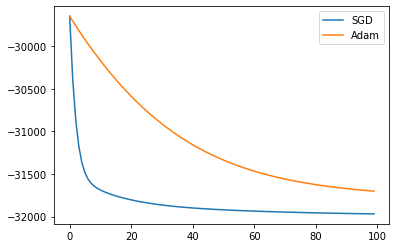

In [14]:
synthetic_experiment(
    num_pos_users=2000, # large size
    num_neg_users=2000, # large size
    num_random_words=30000, # large size
    lam=None, 
    shape=0.1, 
    scale=0.5,
    dim = 10 # small dim
)

sparsity = 0.039280691666666666


100%|██████████| 100/100 [04:05<00:00,  2.45s/it]


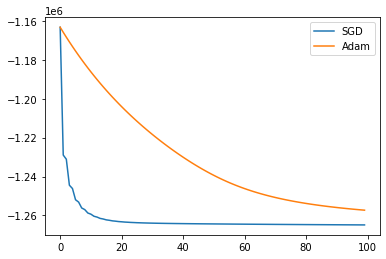

In [6]:
synthetic_experiment(
    num_pos_users=2000, # large size
    num_neg_users=2000, # large size
    num_random_words=30000, # large size
    lam=None, 
    shape=0.1, 
    scale=0.5,
    dim = 50 # medium dim
)

sparsity = 0.04009615833333333


100%|██████████| 100/100 [04:20<00:00,  2.60s/it]


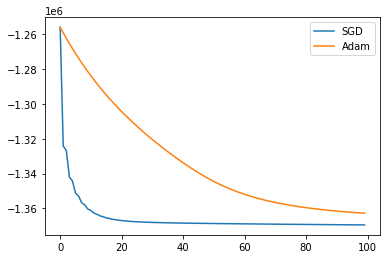

In [7]:
synthetic_experiment(
    num_pos_users=2000, # large size
    num_neg_users=2000, # large size
    num_random_words=30000, # large size
    lam=None, 
    shape=0.1, 
    scale=0.5,
    dim = 100 # medium dim
)

# 不均衡性

## small data 

  6%|▌         | 6/100 [00:00<00:01, 50.58it/s]

sparsity = 0.0412425


100%|██████████| 100/100 [00:01<00:00, 51.16it/s]


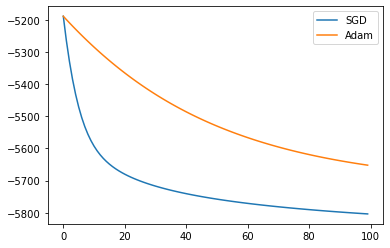

In [16]:
synthetic_experiment(
    num_pos_users=120, # little imbalance
    num_neg_users=280, # little imbalance
    num_random_words=1000, # small size
    lam=None, 
    shape=0.1, 
    scale=0.5,
    dim = 10 
)

  5%|▌         | 5/100 [00:00<00:01, 47.53it/s]

sparsity = 0.0398925


100%|██████████| 100/100 [00:01<00:00, 52.08it/s]


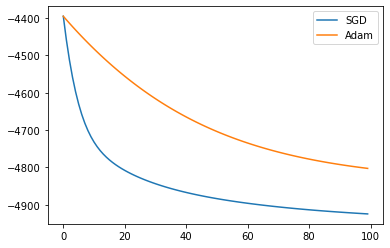

In [6]:
synthetic_experiment(
    num_pos_users=40, # medium imbalance
    num_neg_users=360, # medium imbalance
    num_random_words=1000, # medium size
    lam=None, 
    shape=0.1, 
    scale=0.5,
    dim = 10 
)

### medium data

sparsity = 0.040807333333333334


100%|██████████| 100/100 [00:07<00:00, 13.19it/s]


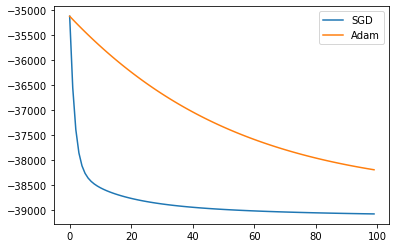

In [4]:
synthetic_experiment(
    num_pos_users=200, # little imbalance
    num_neg_users=800, # little imbalance
    num_random_words=3000, # medium size
    lam=None, 
    shape=0.1, 
    scale=0.5,
    dim = 10 
)

sparsity = 0.04176933333333333


100%|██████████| 100/100 [00:07<00:00, 12.98it/s]


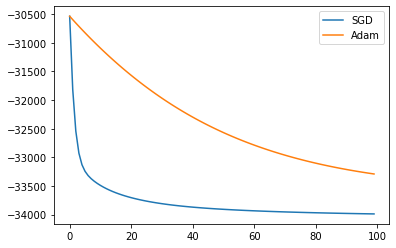

In [27]:
synthetic_experiment(
    num_pos_users=100, # medium imbalance
    num_neg_users=900, # medium imbalance
    num_random_words=3000, # medium size
    lam=None, 
    shape=0.1, 
    scale=0.5,
    dim = 10 
)

sparsity = 0.04276733333333333


100%|██████████| 100/100 [00:07<00:00, 12.75it/s]


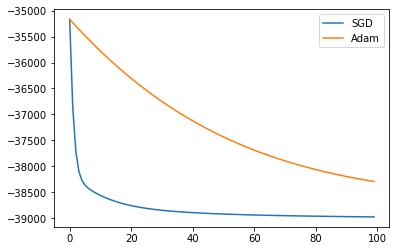

In [29]:
synthetic_experiment(
    num_pos_users=10, # high imbalance
    num_neg_users=990, # high imbalance
    num_random_words=3000, # medium size
    lam=None, 
    shape=0.1, 
    scale=0.5,
    dim = 10 
)

### large data

sparsity = 0.039713875


100%|██████████| 100/100 [03:58<00:00,  2.39s/it]


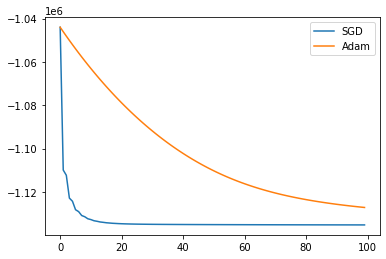

In [12]:
synthetic_experiment(
    num_pos_users=2000, # large - little imbalance
    num_neg_users=2000, # large - little imbalance
    num_random_words=30000, # large size
    lam=None, 
    shape=0.1, 
    scale=0.5,
    dim = 10 
)

  5%|▌         | 5/100 [00:00<00:01, 49.91it/s]

sparsity = 0.04406


100%|██████████| 100/100 [00:01<00:00, 51.01it/s]


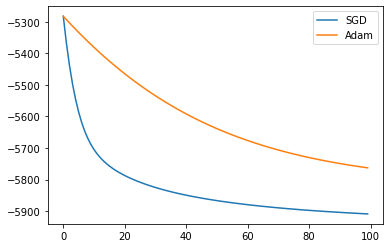

In [14]:
synthetic_experiment(
    num_pos_users=40, # large - little imbalance
    num_neg_users=360, # large - little imbalance
    num_random_words=1000, # large size
    lam=None, 
    shape=0.1, 
    scale=0.5,
    dim = 10 
)

sparsity = 0.04075170833333333


100%|██████████| 10/10 [00:23<00:00,  2.40s/it]


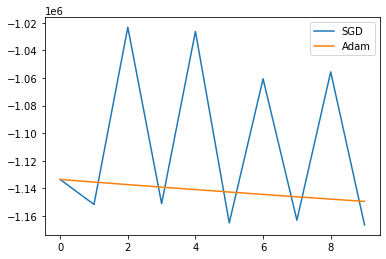

In [11]:
synthetic_experiment(
    num_pos_users=800, # large - little imbalance
    num_neg_users=3200, # large - little imbalance
    num_random_words=30000, # large size
    lam=None, 
    shape=0.1, 
    scale=0.5,
    dim = 10,
    optim_steps=10,
)

sparsity = 0.03904933333333333


100%|██████████| 100/100 [03:56<00:00,  2.36s/it]


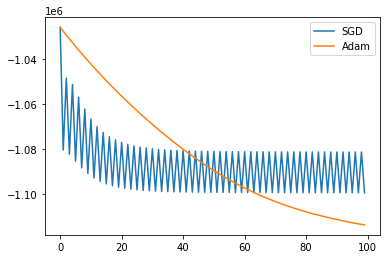

In [15]:
synthetic_experiment(
    num_pos_users=300 * 4, # large - little imbalance
    num_neg_users=700 * 4, # large - little imbalance
    num_random_words=30000, # large size
    lam=None, 
    shape=0.1, 
    scale=0.5,
    dim = 10 
)

sparsity = 0.03947696666666667


100%|██████████| 100/100 [03:56<00:00,  2.36s/it]


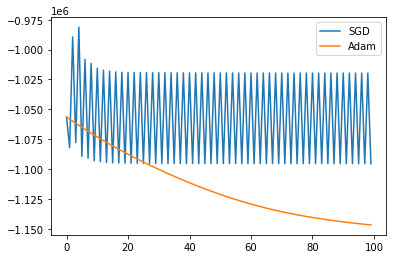

In [8]:
synthetic_experiment(
    num_pos_users=200 * 4, # large - little imbalance
    num_neg_users=800 * 4, # large - little imbalance
    num_random_words=30000, # large size
    lam=None, 
    shape=0.1, 
    scale=0.5,
    dim = 10 
)

sparsity = 0.03973030833333333


100%|██████████| 100/100 [03:56<00:00,  2.37s/it]


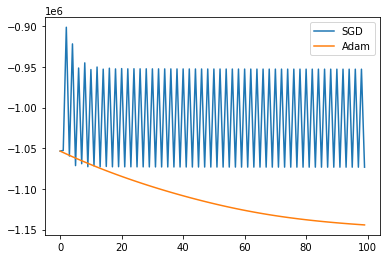

In [9]:
synthetic_experiment(
    num_pos_users=100 * 4, # large - middle imbalance
    num_neg_users=900 * 4, # large - middle imbalance,
    num_random_words=30000, # large size
    lam=None, 
    shape=0.1, 
    scale=0.5,
    dim = 10 
)

sparsity = 0.038713816666666664


100%|██████████| 100/100 [03:57<00:00,  2.37s/it]


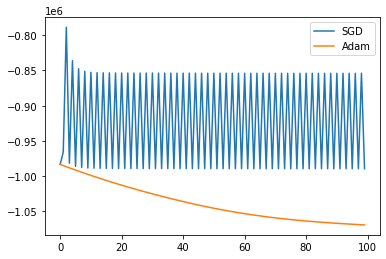

In [10]:
synthetic_experiment(
    num_pos_users=10 * 4, # large - high imbalance
    num_neg_users=990 * 4, # large - high imbalance
    num_random_words=30000, # large size
    lam=None, 
    shape=0.1, 
    scale=0.5,
    dim = 10 
)

sparsity = 0.0400425


100%|██████████| 100/100 [04:05<00:00,  2.45s/it]


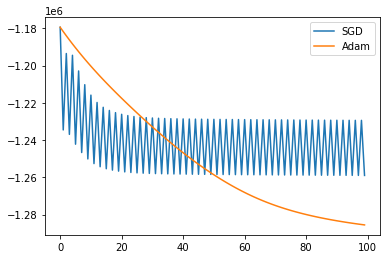

In [17]:
synthetic_experiment(
    num_pos_users=300 * 4, # large - little imbalance
    num_neg_users=700 * 4, # large - little imbalance
    num_random_words=30000, # large size
    lam=None, 
    shape=0.1, 
    scale=0.5,
    dim = 50 
)

sparsity = 0.040666683333333335


100%|██████████| 100/100 [04:06<00:00,  2.46s/it]


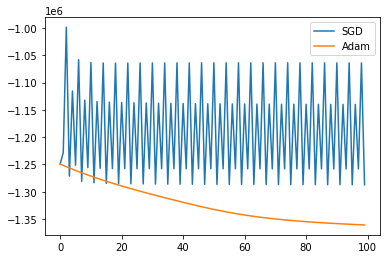

In [18]:
synthetic_experiment(
    num_pos_users=100 * 4, # large - middle imbalance
    num_neg_users=900 * 4, # large - middle imbalance,
    num_random_words=30000, # large size
    lam=None, 
    shape=0.1, 
    scale=0.5,
    dim = 50 
)

sparsity = 0.039870158333333336


100%|██████████| 100/100 [04:06<00:00,  2.46s/it]


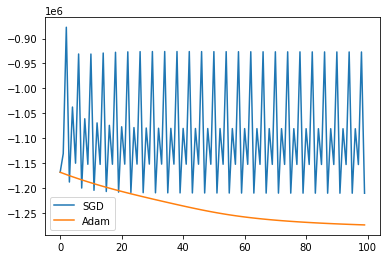

In [19]:
synthetic_experiment(
    num_pos_users=10 * 4, # large - high imbalance
    num_neg_users=990 * 4, # large - high imbalance
    num_random_words=30000, # large size
    lam=None, 
    shape=0.1, 
    scale=0.5,
    dim = 50 
)

sparsity = 0.039468875


100%|██████████| 100/100 [00:55<00:00,  1.80it/s]


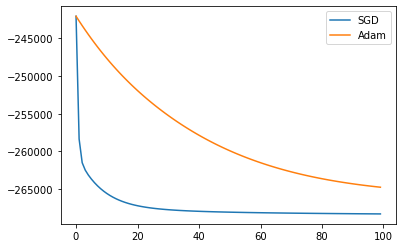

In [20]:
synthetic_experiment(
    num_pos_users=300 * 4, # large - little imbalance
    num_neg_users=700 * 4, # large - little imbalance
    num_random_words=6000, # large size
    lam=None, 
    shape=0.1, 
    scale=0.5,
    dim = 50 
)

sparsity = 0.0384539


100%|██████████| 100/100 [01:27<00:00,  1.14it/s]


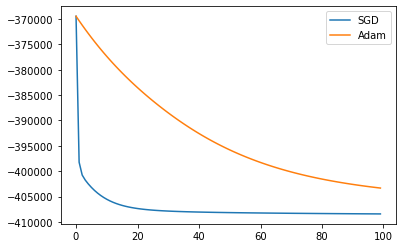

In [21]:
synthetic_experiment(
    num_pos_users=300 * 4, # large - little imbalance
    num_neg_users=700 * 4, # large - little imbalance
    num_random_words=10000, # large size
    lam=None, 
    shape=0.1, 
    scale=0.5,
    dim = 50 
)

sparsity = 0.039732825


100%|██████████| 100/100 [02:48<00:00,  1.69s/it]


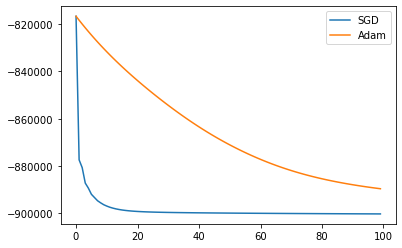

In [22]:
synthetic_experiment(
    num_pos_users=300 * 4, # large - little imbalance
    num_neg_users=700 * 4, # large - little imbalance
    num_random_words=20000, # large size
    lam=None, 
    shape=0.1, 
    scale=0.5,
    dim = 50 
)

In [ ]:
synthetic_experiment(
    num_pos_users=120, # little imbalance
    num_neg_users=280, # little imbalance
    num_random_words=10000, # small size
    lam=None, 
    shape=0.1, 
    scale=0.5,
    dim = 10 
)

sparsity = 0.04010125


100%|██████████| 100/100 [00:28<00:00,  3.55it/s]


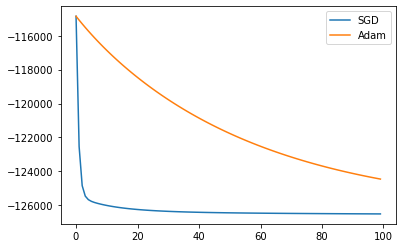

In [30]:
synthetic_experiment(
    num_pos_users=120, # little imbalance
    num_neg_users=280, # little imbalance
    num_random_words=30000, # small size
    lam=None, 
    shape=0.1, 
    scale=0.5,
    dim = 10 
)

sparsity = 0.039791483333333336


100%|██████████| 100/100 [04:00<00:00,  2.41s/it]


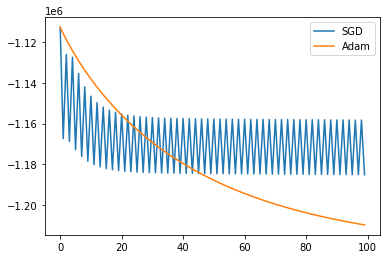

In [29]:
synthetic_experiment(
    num_pos_users=120, # little imbalance
    num_neg_users=280, # little imbalance
    num_random_words=300000, # small size
    lam=None, 
    shape=0.1, 
    scale=0.5,
    dim = 10 
)

# 分布乖離度

sparsity = 0.05093989166666667


100%|██████████| 100/100 [03:53<00:00,  2.34s/it]


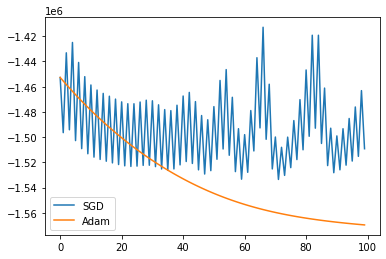

In [23]:
synthetic_experiment(
    num_pos_users=300 * 4, # large - little imbalance
    num_neg_users=700 * 4, # large - little imbalance
    num_random_words=30000, # large size
    lam=None, 
    shape=0.1, 
    scale=0.5,
    pos_shape = 0.1, # posのみ k をあげる 
    dim = 10, 
)

sparsity = 0.03423486666666667


100%|██████████| 100/100 [03:57<00:00,  2.38s/it]


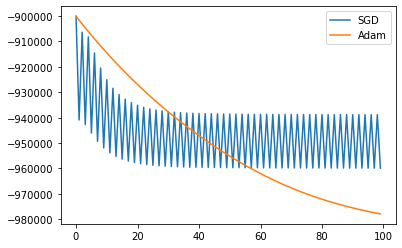

In [24]:
synthetic_experiment(
    num_pos_users=300 * 4, # large - little imbalance
    num_neg_users=700 * 4, # large - little imbalance
    num_random_words=30000, # large size
    lam=None, 
    shape=0.1, 
    scale=0.5,
    pos_shape = - 0.05,# posのみ k をさげる 
    dim = 10, 
)

sparsity = 0.025605925


100%|██████████| 100/100 [03:59<00:00,  2.40s/it]


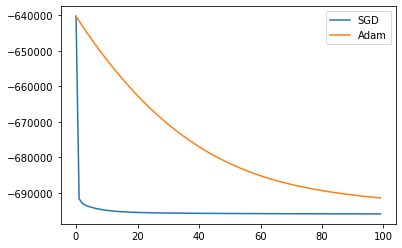

In [6]:
synthetic_experiment(
    num_pos_users=300 * 4, # large - little imbalance
    num_neg_users=700 * 4, # large - little imbalance
    num_random_words=30000, # large size
    lam=None, 
    shape=0.1, 
    scale=0.5,
    neg_shape = -0.05,# neg のみ k をさげる 
    dim = 10, 
)

sparsity = 0.03214053333333333


100%|██████████| 100/100 [04:01<00:00,  2.41s/it]


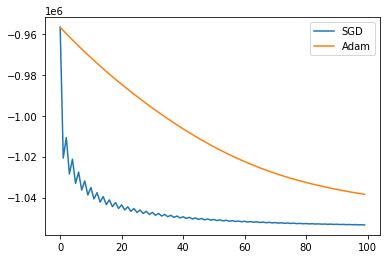

In [3]:
synthetic_experiment(
    num_pos_users=300 * 4, # large - little imbalance
    num_neg_users=700 * 4, # large - little imbalance
    num_random_words=30000, # large size
    lam=None, 
    shape=0.1, 
    scale=0.5,
    neg_lam = -0.05,
    dim = 10, 
)

sparsity = 0.042812858333333335


100%|██████████| 100/100 [03:56<00:00,  2.36s/it]


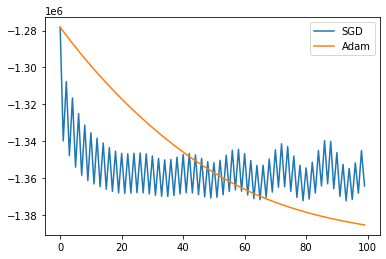

In [5]:
synthetic_experiment(
    num_pos_users=300 * 4, # large - little imbalance
    num_neg_users=700 * 4, # large - little imbalance
    num_random_words=30000, # large size
    lam=None, 
    shape=0.1, 
    scale=0.5,
    pos_scale = 0.2, # pos のみ θ をあげる 
    dim = 10, 
)

In [ ]:
synthetic_experiment(
    num_pos_users=300 * 4, # large - little imbalance
    num_neg_users=700 * 4, # large - little imbalance
    num_random_words=30000, # large size
    lam=None, 
    shape=0.1, 
    scale=0.5,
    pos_scale = 0.3, # pos のみ θ をあげる 
    dim = 10, 
)

In [3]:
X, y = create_synthetic_data(
    num_pos_users=300 * 4, # large - little imbalance
    num_neg_users=700 * 4, # large - little imbalance
    num_random_words=30000, # large size
    lam=None, 
    shape=0.1, 
    scale=0.5,
    neg_shape = -0.05,# neg のみ k をさげる 
)

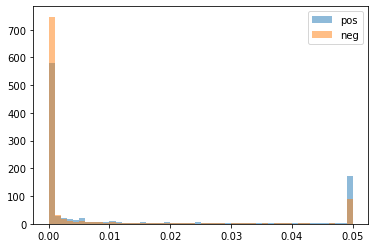

In [7]:
plt.hist(np.clip(csr_matrix(X)[y == 1].mean(axis=0).A[0], 0, 0.05), alpha=0.5, density=True, label="pos", bins=50)
plt.hist(np.clip(csr_matrix(X)[y == 0].mean(axis=0).A[0], 0, 0.05), alpha=0.5, density=True, label="neg", bins=50)
plt.legend()
plt.show()

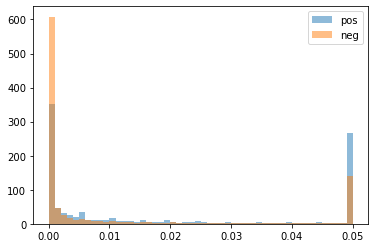

In [8]:
plt.hist(np.clip(csr_matrix(X)[y == 1][:, X.sum(axis=0).A[0] != 0].mean(axis=0).A[0], 0, 0.05), alpha=0.5, density=True, label="pos", bins=50)
plt.hist(np.clip(csr_matrix(X)[y == 0][:, X.sum(axis=0).A[0] != 0].mean(axis=0).A[0], 0, 0.05), alpha=0.5, density=True, label="neg", bins=50)
plt.legend()
plt.show()

In [13]:
w_mean = X.mean(axis=0).A[0]
((w_mean > 0) & (w_mean < 0.05)).mean()

0.4889

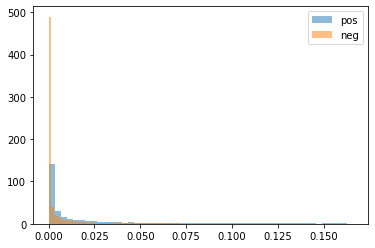

In [17]:
plt.hist(csr_matrix(X)[y == 1][:,(w_mean > 0) & (w_mean < 0.05)].mean(axis=0).A[0], alpha=0.5, density=True, label="pos", bins=50)
plt.hist(csr_matrix(X)[y == 0][:, (w_mean > 0) & (w_mean < 0.05)].mean(axis=0).A[0], alpha=0.5, density=True, label="neg", bins=50)
plt.legend()
plt.show()

In [15]:
csr_matrix(X)[y == 1][:,(w_mean > 0) & (w_mean < 0.05)]

<1200x14667 sparse matrix of type '<class 'numpy.int64'>'
	with 365174 stored elements in Compressed Sparse Row format>